In [1]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns', None)

In [61]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')
smaple_data = pd.read_csv('datasets/sample_submission.csv')
data_all = pd.concat([train_data, test_data], ignore_index = True, sort = False)

In [70]:
data_all['origination_date'] = pd.to_datetime(data_all['origination_date'], format='%Y-%m-%d', errors='ignore')
data_all['first_payment_date'] = pd.to_datetime(data_all['first_payment_date'], format='%Y-%m-%d', errors='ignore')

In [3]:
print(train_data.shape, test_data.shape, data_all.shape)

(116058, 29) (35866, 28) (151924, 29)


In [71]:
data_all.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,2012-05-01 00:00:00,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1.0
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,2012-03-01 00:00:00,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1.0
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,2012-03-01 00:00:00,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,2012-04-01 00:00:00,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1.0
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,2012-04-01 00:00:00,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1.0


In [72]:
data_all.tail()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
151919,35862,X,OTHER,4.125,232000,240,2012-01-01,Apr-12,80,2.0,30.0,684.0,C86,0.0,712.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
151920,35863,Z,Edwards-Hoffman,3.375,204000,180,2012-01-01,Mar-12,80,1.0,30.0,812.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
151921,35864,X,Browning-Hart,4.250,200000,360,2012-01-02,Apr-12,52,2.0,38.0,624.0,B12,0.0,646.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,NaN
151922,35865,Y,Edwards-Hoffman,4.375,400000,360,2012-01-02,Apr-12,66,1.0,34.0,753.0,A23,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
151923,35866,X,OTHER,4.375,182000,360,2012-01-02,Apr-12,70,1.0,3.0,0.0,C86,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [6]:
data_all.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [75]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151924 entries, 0 to 151923
Data columns (total 29 columns):
loan_id                     151924 non-null int64
source                      151924 non-null object
financial_institution       151924 non-null object
interest_rate               151924 non-null float64
unpaid_principal_bal        151924 non-null int64
loan_term                   151924 non-null int64
origination_date            151924 non-null datetime64[ns]
first_payment_date          151924 non-null object
loan_to_value               151924 non-null int64
number_of_borrowers         151924 non-null float64
debt_to_income_ratio        151924 non-null float64
borrower_credit_score       151924 non-null float64
loan_purpose                151924 non-null object
insurance_percent           151924 non-null float64
co-borrower_credit_score    151924 non-null float64
insurance_type              151924 non-null float64
m1                          151924 non-null int64
m2          

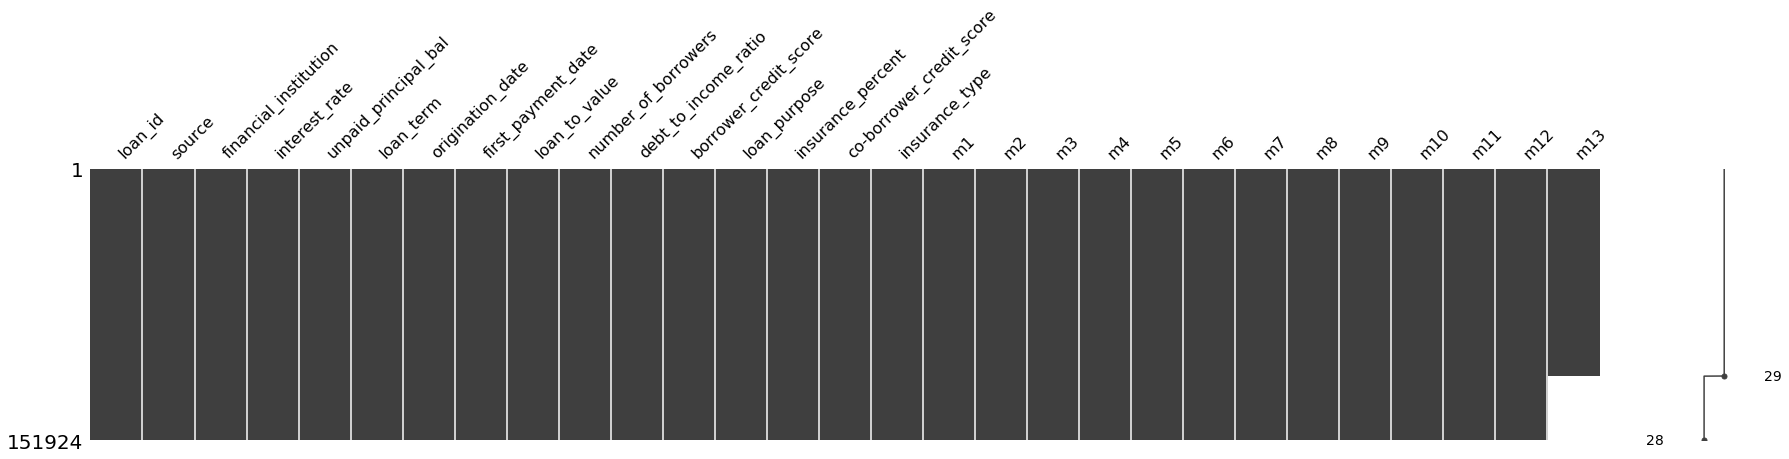

In [8]:
missingno.matrix(data_all, figsize=(30,5));

In [9]:
data_all.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.519240e+05,151924.000000,1.519240e+05,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,116058.000000
mean,4.197103e+11,3.869879,2.081173e+05,292.481458,67.421645,1.594040,30.747150,769.926713,2.772860,460.278514,0.003238,0.003113,0.002119,0.001968,0.002139,0.003337,0.003173,0.003976,0.004555,0.005114,0.006365,0.006885,0.007892,0.005480
std,3.255504e+11,0.460908,1.146558e+05,89.653613,17.281065,0.491078,9.729672,42.109207,8.080634,381.798443,0.056815,0.062714,0.053283,0.055763,0.061484,0.080205,0.083153,0.097749,0.108693,0.122103,0.142497,0.158087,0.174150,0.073824
min,1.000000e+00,2.250000,1.100000e+04,60.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.158882e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.103649e+11,3.875000,1.820000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,741.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.040456e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,799.000000,0.000000,791.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,1.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [10]:
data_all['interest_rate'].sort_values(ascending = True).value_counts()

3.875    27645
4.000    18788
3.250    12702
3.750    10905
4.125    10505
4.250     9848
4.375     9232
3.375     8442
4.500     5984
3.500     5719
3.990     3989
3.125     3921
3.625     3876
3.000     3626
4.625     2574
4.750     1893
2.875     1876
4.875     1581
5.000      635
2.750      477
2.990      403
5.125      376
5.250      338
3.950      256
5.375      244
3.850      189
4.990      173
3.100      154
4.490      149
3.900      132
         ...  
4.388        1
4.517        1
3.515        1
4.473        1
3.404        1
3.471        1
2.690        1
3.198        1
2.910        1
4.825        1
3.195        1
4.502        1
3.055        1
3.493        1
4.253        1
4.332        1
4.336        1
3.624        1
3.251        1
3.635        1
3.031        1
2.810        1
3.735        1
3.596        1
3.505        1
3.455        1
3.390        1
4.072        1
2.895        1
3.333        1
Name: interest_rate, Length: 1121, dtype: int64

In [11]:
train_data['m13'].value_counts()

0    115422
1       636
Name: m13, dtype: int64

In [13]:
data_all['unpaid_principal_bal'].value_counts()

417000     3530
100000     1847
200000     1726
150000     1587
120000     1210
140000     1137
160000     1109
300000     1106
180000     1097
125000      990
130000      981
250000      958
90000       937
80000       910
400000      901
110000      887
240000      868
135000      845
128000      823
175000      821
170000      800
75000       784
220000      734
105000      730
115000      717
190000      716
165000      714
60000       697
104000      691
112000      691
           ... 
788000        1
689000        1
776000        1
727000        1
765000        1
684000        1
733000        1
656000        1
11000         1
630000        1
421000        1
715000        1
672000        1
1200000       1
754000        1
915000        1
644000        1
968000        1
791000        1
750000        1
794000        1
707000        1
660000        1
642000        1
665000        1
718000        1
675000        1
721000        1
713000        1
742000        1
Name: unpaid_principal_b

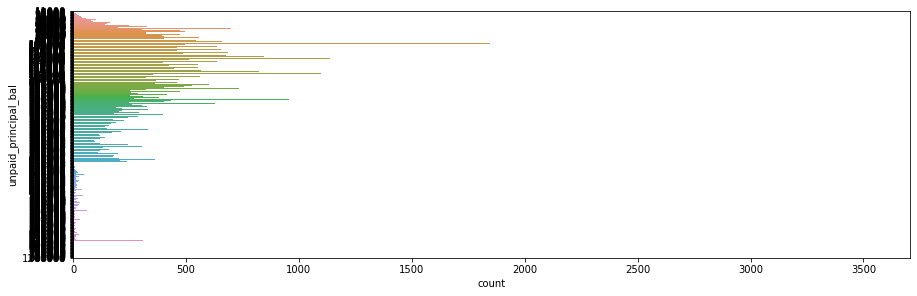

In [14]:
fig = plt.figure(figsize = (15,10))
ax1=fig.add_subplot(2,1,1)
sns.countplot(y='unpaid_principal_bal', ax=ax1, data=data_all);

In [15]:
data_bin=pd.DataFrame()
data_con = pd.DataFrame()

In [16]:
data_bin['interest_rate']=pd.cut(data_all['interest_rate'],10)
data_con['interest_rate']=data_all['interest_rate']

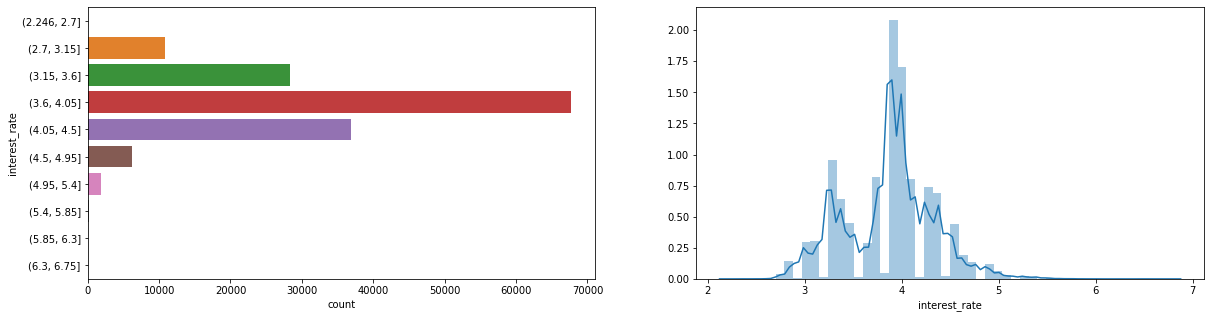

In [17]:
fig=plt.figure(figsize=(20,5))
ax1=fig.add_subplot(1,2,1)
sns.countplot(y="interest_rate", ax=ax1, data=data_bin);
ax2=fig.add_subplot(1,2,2)
sns.distplot(data_con['interest_rate'], ax=ax2);

In [18]:
data_bin['unpaid_principal_bal']=pd.cut(data_all['unpaid_principal_bal'],10)
data_con['unpaid_principal_bal']=data_all['unpaid_principal_bal']

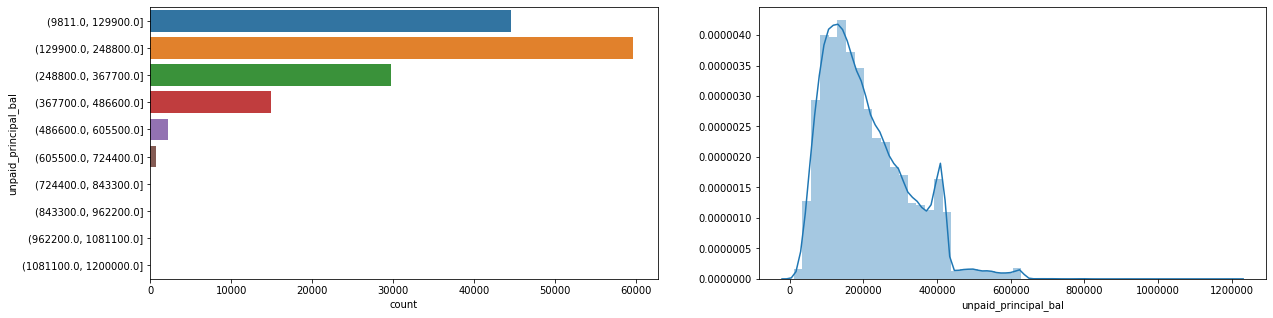

In [19]:
fig=plt.figure(figsize=(20,5))
ax1=fig.add_subplot(1,2,1)
sns.countplot(y="unpaid_principal_bal", ax=ax1, data=data_bin);
ax2=fig.add_subplot(1,2,2)
sns.distplot(data_con['unpaid_principal_bal'], ax=ax2);

In [20]:
data_all['loan_term'].value_counts()

360    94127
180    37330
120     9158
240     8879
300     1194
96       226
156      124
144      104
336       92
324       59
168       51
348       42
108       39
276       29
312       27
84        26
132       24
121       22
288       19
216       19
264       16
150       12
228       11
166        9
162        8
60         8
153        7
354        7
352        7
165        6
       ...  
335        1
314        1
322        1
310        1
309        1
308        1
307        1
178        1
177        1
304        1
303        1
76         1
172        1
77         1
296        1
347        1
81         1
295        1
167        1
82         1
83         1
85         1
290        1
86         1
88         1
89         1
91         1
319        1
219        1
130        1
Name: loan_term, Length: 149, dtype: int64

In [21]:
data_bin['loan_term'] = pd.cut(data_all['loan_term'], 10)
data_con['loan_term'] = data_all["loan_term"]

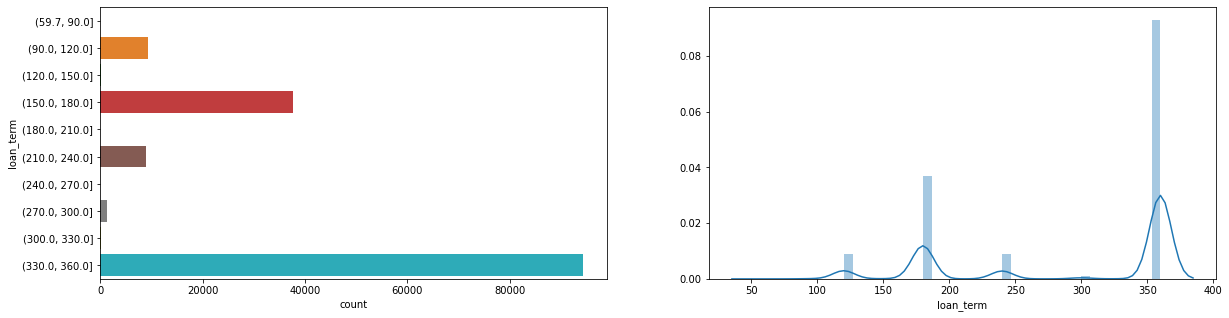

In [22]:
fig=plt.figure(figsize=(20,5))
ax1=fig.add_subplot(1,2,1)
sns.countplot(y='loan_term', ax=ax1, data=data_bin);
ax2=fig.add_subplot(1,2,2)
sns.distplot(data_con['loan_term'], ax=ax2);

In [23]:
data_all['loan_to_value'].value_counts()

80    29301
75    10744
95     5698
70     4458
90     4274
79     3606
60     3346
74     3278
78     3039
72     2922
73     2918
77     2691
68     2571
69     2550
71     2488
67     2428
65     2403
64     2243
66     2159
76     2090
58     2090
63     2085
59     2069
56     1932
62     1912
50     1872
85     1843
55     1821
57     1778
54     1750
      ...  
93      470
27      469
83      399
25      390
24      390
26      381
86      358
23      321
22      308
21      280
91      254
19      248
20      236
82      222
18      179
17      150
16      132
14       90
15       89
12       63
13       62
96       59
11       46
81       40
10       36
9        15
8        13
7         8
6         6
5         1
Name: loan_to_value, Length: 93, dtype: int64

In [24]:
data_bin['loan_to_value'] = pd.cut(data_all['loan_to_value'], 10)
data_con['loan_to_value'] = data_all['loan_to_value']

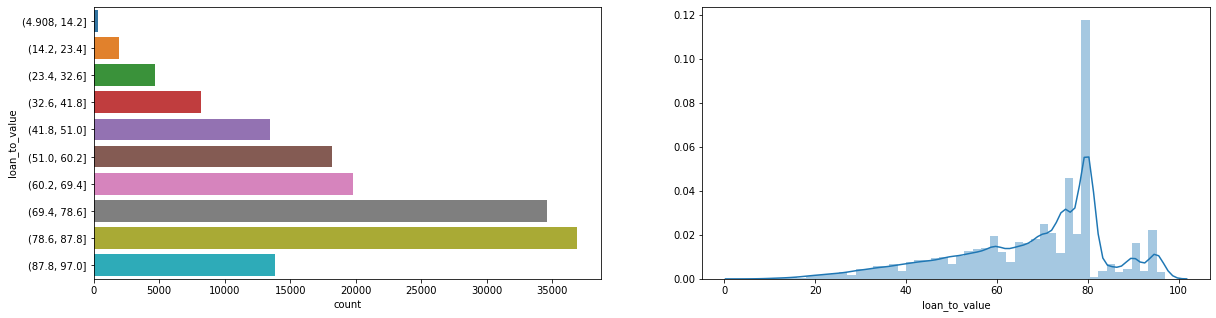

In [25]:
fig=plt.figure(figsize=(20,5))
ax1=fig.add_subplot(1,2,1)
sns.countplot(y='loan_to_value', ax=ax1, data=data_bin);
ax2=fig.add_subplot(1,2,2)
sns.distplot(data_con['loan_to_value'], ax=ax2);

In [26]:
data_all['number_of_borrowers'].value_counts()

2.0    90249
1.0    61675
Name: number_of_borrowers, dtype: int64

In [27]:
data_bin['number_of_borrowers'] = data_all['number_of_borrowers']
data_con['number_of_borrowers'] = data_all['number_of_borrowers']

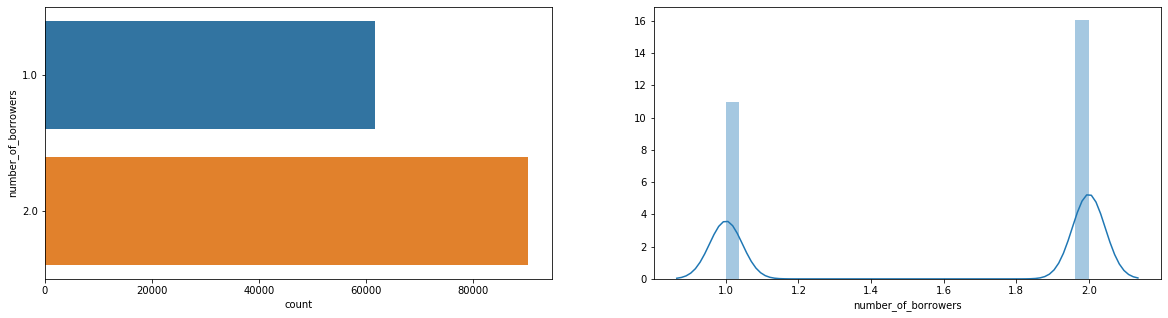

In [28]:
fig=plt.figure(figsize=(20,5))
ax1=fig.add_subplot(1,2,1)
sns.countplot(y='number_of_borrowers', ax=ax1, data=data_bin);
ax2=fig.add_subplot(1,2,2)
sns.distplot(data_con['number_of_borrowers'], ax=ax2);

In [29]:
data_all['debt_to_income_ratio'].value_counts()

44.0    5460
43.0    5217
42.0    5143
30.0    4984
41.0    4979
40.0    4963
39.0    4960
28.0    4953
31.0    4944
29.0    4939
33.0    4929
26.0    4891
36.0    4862
37.0    4858
27.0    4856
32.0    4851
34.0    4828
35.0    4824
38.0    4824
25.0    4754
24.0    4556
22.0    4425
23.0    4376
45.0    4302
21.0    4177
20.0    3860
19.0    3582
18.0    3237
17.0    2920
16.0    2601
15.0    2180
14.0    1838
13.0    1610
12.0    1221
46.0    1100
47.0    1071
48.0    1045
49.0    1040
11.0     917
10.0     749
50.0     710
9.0      449
8.0      319
7.0      240
6.0      134
5.0       98
4.0       52
3.0       38
2.0       26
51.0      10
1.0        9
52.0       3
55.0       3
53.0       3
61.0       1
56.0       1
64.0       1
58.0       1
Name: debt_to_income_ratio, dtype: int64

In [30]:
data_bin['debt_to_income_ratio'] = pd.cut(data_all['debt_to_income_ratio'], 10)
data_con['debt_to_income_ratio'] = data_all['debt_to_income_ratio']

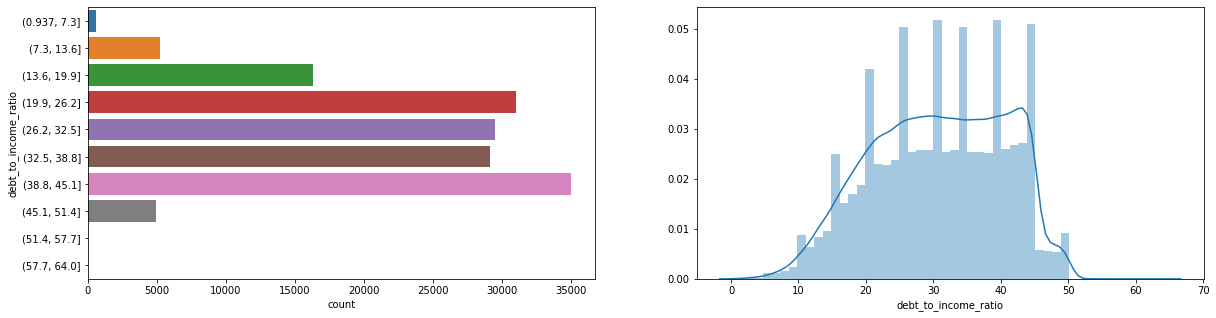

In [31]:
fig=plt.figure(figsize=(20,5))
ax1=fig.add_subplot(1,2,1)
sns.countplot(y='debt_to_income_ratio', ax=ax1, data=data_bin);
ax2=fig.add_subplot(1,2,2)
sns.distplot(data_con['debt_to_income_ratio'], ax=ax2);

In [32]:
data_all['borrower_credit_score'].value_counts()

801.0    3025
809.0    2965
802.0    2677
808.0    2645
791.0    2610
800.0    2424
797.0    2420
790.0    2356
798.0    2354
804.0    2340
799.0    2305
787.0    2298
796.0    2293
793.0    2169
795.0    2129
794.0    2091
803.0    2090
788.0    2080
792.0    2051
784.0    1974
786.0    1961
813.0    1925
806.0    1844
783.0    1832
812.0    1827
789.0    1823
807.0    1815
781.0    1785
805.0    1747
778.0    1739
         ... 
630.0      40
632.0      40
639.0      37
626.0      37
629.0      35
635.0      33
636.0      33
625.0      33
633.0      33
623.0      30
621.0      30
620.0      29
622.0      28
826.0      28
624.0      27
628.0      25
828.0      22
827.0      21
832.0      18
830.0       8
834.0       5
480.0       1
559.0       1
839.0       1
831.0       1
833.0       1
835.0       1
838.0       1
840.0       1
619.0       1
Name: borrower_credit_score, Length: 223, dtype: int64

In [33]:
data_bin['borrower_credit_score'] = pd.cut(data_all['borrower_credit_score'], 10)
data_con['borrower_credit_score'] = data_all['borrower_credit_score']

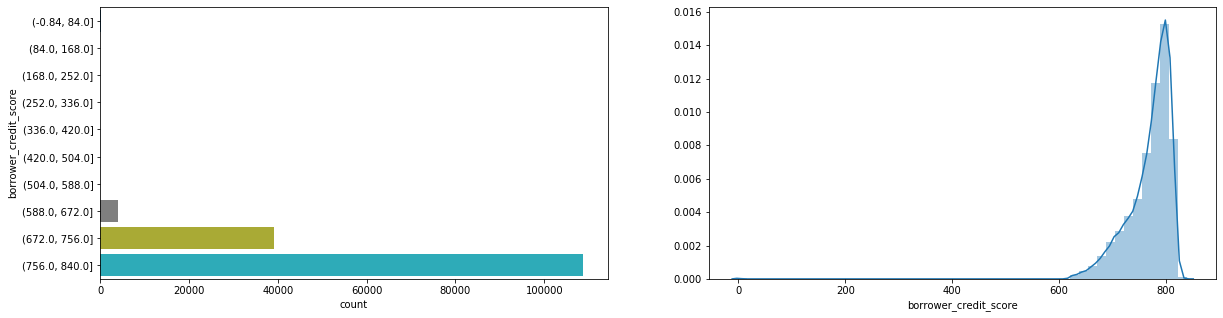

In [34]:
fig=plt.figure(figsize=(20,5))
ax1=fig.add_subplot(1,2,1)
sns.countplot(y='borrower_credit_score', ax=ax1, data=data_bin);
ax2=fig.add_subplot(1,2,2)
sns.distplot(data_con['borrower_credit_score'], ax=ax2);

In [35]:
data_all['insurance_percent'].value_counts()

0.0     134211
30.0      6690
25.0      6331
12.0      3249
6.0        906
35.0       483
16.0        29
18.0        14
17.0         4
20.0         3
22.0         1
40.0         1
15.0         1
39.0         1
Name: insurance_percent, dtype: int64

In [36]:
data_bin['insurance_percent'] = pd.cut(data_all['insurance_percent'], 10)
data_con['insurance_percent'] = data_all['insurance_percent']

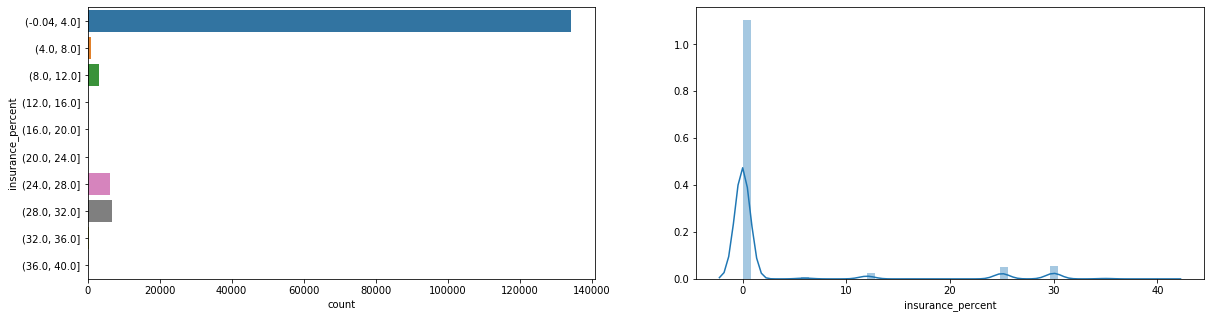

In [37]:
fig=plt.figure(figsize=(20,5))
ax1=fig.add_subplot(1,2,1)
sns.countplot(y='insurance_percent', ax=ax1, data=data_bin);
ax2=fig.add_subplot(1,2,2)
sns.distplot(data_con['insurance_percent'], ax=ax2);

In [38]:
data_all['co-borrower_credit_score'].value_counts()

0.0      61734
801.0     2000
809.0     1982
808.0     1916
802.0     1773
791.0     1715
797.0     1621
790.0     1599
799.0     1572
796.0     1542
798.0     1537
800.0     1475
803.0     1431
804.0     1420
787.0     1412
794.0     1378
793.0     1367
806.0     1304
813.0     1304
795.0     1302
792.0     1293
812.0     1269
805.0     1266
788.0     1263
784.0     1229
816.0     1190
786.0     1151
807.0     1141
789.0     1115
785.0     1115
         ...  
641.0       21
637.0       20
633.0       19
640.0       18
828.0       17
636.0       17
642.0       16
638.0       16
630.0       15
632.0       14
639.0       14
623.0       13
625.0       12
624.0       12
621.0       12
827.0       12
634.0       11
622.0       10
635.0       10
631.0        9
628.0        9
620.0        9
629.0        7
626.0        7
832.0        7
830.0        6
627.0        5
834.0        2
831.0        2
836.0        1
Name: co-borrower_credit_score, Length: 216, dtype: int64

In [39]:
data_bin['co-borrower_credit_score'] = pd.cut(data_all['co-borrower_credit_score'], 10)
data_con['co-borrower_credit_score'] = data_all['co-borrower_credit_score']

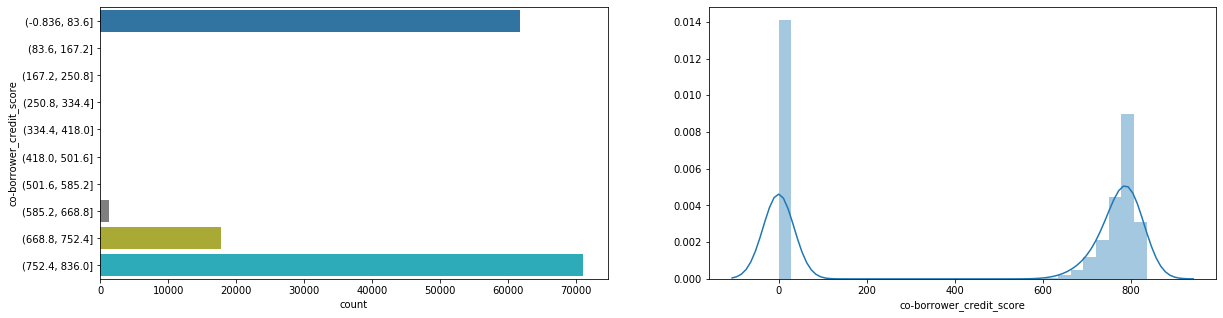

In [40]:
fig=plt.figure(figsize=(20,5))
ax1=fig.add_subplot(1,2,1)
sns.countplot(y='co-borrower_credit_score', ax=ax1, data=data_bin);
ax2=fig.add_subplot(1,2,2)
sns.distplot(data_con['co-borrower_credit_score'], ax=ax2);

In [41]:
data_all['insurance_type'].value_counts()

0.0    151432
1.0       492
Name: insurance_type, dtype: int64

In [42]:
data_bin['insurance_type'] = data_all['insurance_type']
data_con['insurance_type'] = data_all['insurance_type']

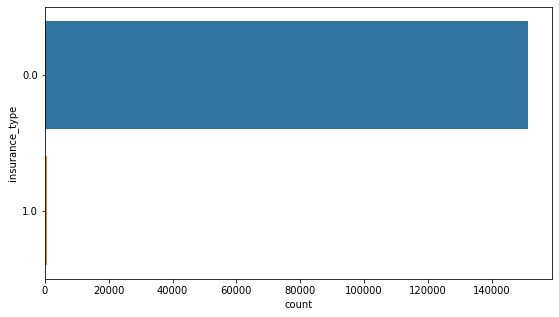

In [43]:
fig=plt.figure(figsize=(20,5))
ax1=fig.add_subplot(1,2,1)
sns.countplot(y='insurance_type', ax=ax1, data=data_bin);

In [44]:
data_all.describe(include=['O'])

,source,financial_institution,origination_date,first_payment_date,loan_purpose
count,151924,151924,151924,151924,151924
unique,3,19,6,8,3
top,X,OTHER,2012-02-01,04/2012,A23
freq,83572,64861,52334,52840,76354


In [45]:
data_all.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

source                    3
financial_institution    19
origination_date          6
first_payment_date        8
loan_purpose              3
dtype: int64

In [48]:
# one hot encoding
one_hot_cols = data_bin.columns.tolist()
#one_hot_cols.remove('m13')
data_bin_enc = pd.get_dummies(data_bin,columns = one_hot_cols)

In [49]:
data_bin_enc.head()

,"interest_rate_(2.246, 2.7]","interest_rate_(2.7, 3.15]","interest_rate_(3.15, 3.6]","interest_rate_(3.6, 4.05]","interest_rate_(4.05, 4.5]","interest_rate_(4.5, 4.95]","interest_rate_(4.95, 5.4]","interest_rate_(5.4, 5.85]","interest_rate_(5.85, 6.3]","interest_rate_(6.3, 6.75]","unpaid_principal_bal_(9811.0, 129900.0]","unpaid_principal_bal_(129900.0, 248800.0]","unpaid_principal_bal_(248800.0, 367700.0]","unpaid_principal_bal_(367700.0, 486600.0]","unpaid_principal_bal_(486600.0, 605500.0]","unpaid_principal_bal_(605500.0, 724400.0]","unpaid_principal_bal_(724400.0, 843300.0]","unpaid_principal_bal_(843300.0, 962200.0]","unpaid_principal_bal_(962200.0, 1081100.0]","unpaid_principal_bal_(1081100.0, 1200000.0]","loan_term_(59.7, 90.0]","loan_term_(90.0, 120.0]","loan_term_(120.0, 150.0]","loan_term_(150.0, 180.0]","loan_term_(180.0, 210.0]","loan_term_(210.0, 240.0]","loan_term_(240.0, 270.0]","loan_term_(270.0, 300.0]","loan_term_(300.0, 330.0]","loan_term_(330.0, 360.0]","loan_to_value_(4.908, 14.2]","loan_to_value_(14.2, 23.4]","loan_to_value_(23.4, 32.6]","loan_to_value_(32.6, 41.8]","loan_to_value_(41.8, 51.0]","loan_to_value_(51.0, 60.2]","loan_to_value_(60.2, 69.4]","loan_to_value_(69.4, 78.6]","loan_to_value_(78.6, 87.8]","loan_to_value_(87.8, 97.0]",number_of_borrowers_1.0,number_of_borrowers_2.0,"debt_to_income_ratio_(0.937, 7.3]","debt_to_income_ratio_(7.3, 13.6]","debt_to_income_ratio_(13.6, 19.9]","debt_to_income_ratio_(19.9, 26.2]","debt_to_income_ratio_(26.2, 32.5]","debt_to_income_ratio_(32.5, 38.8]","debt_to_income_ratio_(38.8, 45.1]","debt_to_income_ratio_(45.1, 51.4]","debt_to_income_ratio_(51.4, 57.7]","debt_to_income_ratio_(57.7, 64.0]","borrower_credit_score_(-0.84, 84.0]","borrower_credit_score_(84.0, 168.0]","borrower_credit_score_(168.0, 252.0]","borrower_credit_score_(252.0, 336.0]","borrower_credit_score_(336.0, 420.0]","borrower_credit_score_(420.0, 504.0]","borrower_credit_score_(504.0, 588.0]","borrower_credit_score_(588.0, 672.0]","borrower_credit_score_(672.0, 756.0]","borrower_credit_score_(756.0, 840.0]","insurance_percent_(-0.04, 4.0]","insurance_percent_(4.0, 8.0]","insurance_percent_(8.0, 12.0]","insurance_percent_(12.0, 16.0]","insurance_percent_(16.0, 20.0]","insurance_percent_(20.0, 24.0]","insurance_percent_(24.0, 28.0]","insurance_percent_(28.0, 32.0]","insurance_percent_(32.0, 36.0]","insurance_percent_(36.0, 40.0]","co-borrower_credit_score_(-0.836, 83.6]","co-borrower_credit_score_(83.6, 167.2]","co-borrower_credit_score_(167.2, 250.8]","co-borrower_credit_score_(250.8, 334.4]","co-borrower_credit_score_(334.4, 418.0]","co-borrower_credit_score_(418.0, 501.6]","co-borrower_credit_score_(501.6, 585.2]","co-borrower_credit_score_(585.2, 668.8]","co-borrower_credit_score_(668.8, 752.4]","co-borrower_credit_score_(752.4, 836.0]",insurance_type_0.0,insurance_type_1.0
0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [50]:
data_all['source'].value_counts()

X    83572
Y    49207
Z    19145
Name: source, dtype: int64

In [51]:
data_bin['source'] = data_all['source']
data_con['source'] = data_all['source']

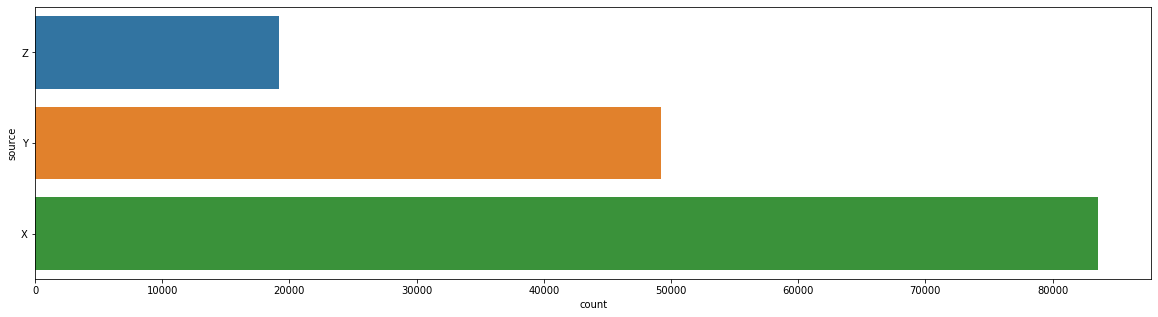

In [52]:
fig = plt.figure(figsize = (20,5))
sns.countplot(y='source', data=data_bin);

In [53]:
data_all['financial_institution'].value_counts()

OTHER                          64861
Browning-Hart                  41930
Swanson, Newton and Miller      8969
Edwards-Hoffman                 6387
Martinez, Duffy and Bird        6163
Miller, Mcclure and Allen       4070
Nicholson Group                 2712
Turner, Baldwin and Rhodes      2388
Suarez Inc                      2376
Cole, Brooks and Vincent        2134
Richards-Walters                1921
Taylor, Hunt and Rodriguez      1656
Sanchez-Robinson                1577
Sanchez, Hays and Wilkerson     1142
Romero, Woods and Johnson        991
Thornton-Davis                   867
Richardson Ltd                   643
Anderson-Taylor                  635
Chapman-Mcmahon                  502
Name: financial_institution, dtype: int64

In [54]:
data_bin['financial_institution'] = data_all['financial_institution']
data_con['financial_institution'] = data_all['financial_institution']

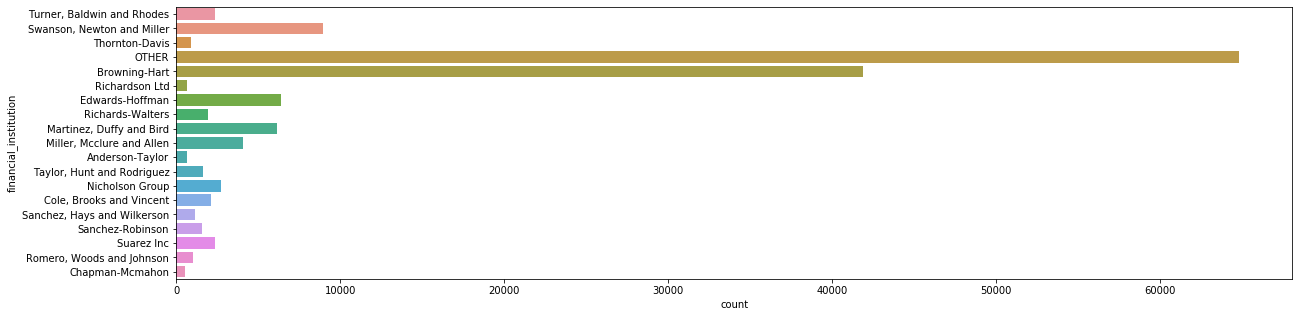

In [55]:
fig = plt.figure(figsize = (20,5))
sns.countplot(y='financial_institution', data=data_bin);

In [74]:
data_all['origination_date'].value_counts() 

2012-01-01    64144
2012-02-01    52334
2012-01-02    16423
2012-03-01    14631
2012-01-03     4392
Name: origination_date, dtype: int64

In [73]:
data_all['first_payment_date'].value_counts() 

2012-04-01 00:00:00    52840
2012-03-01 00:00:00    47680
Apr-12                 16551
2012-05-01 00:00:00    15014
Mar-12                 14661
May-12                  4510
2012-02-01 00:00:00      524
Feb-12                   144
Name: first_payment_date, dtype: int64

In [58]:
data_all['loan_purpose'].value_counts()

A23    76354
B12    38580
C86    36990
Name: loan_purpose, dtype: int64

In [59]:
data_bin['loan_purpose'] = data_all['loan_purpose']
data_con['loan_purpose'] = data_all['loan_purpose']

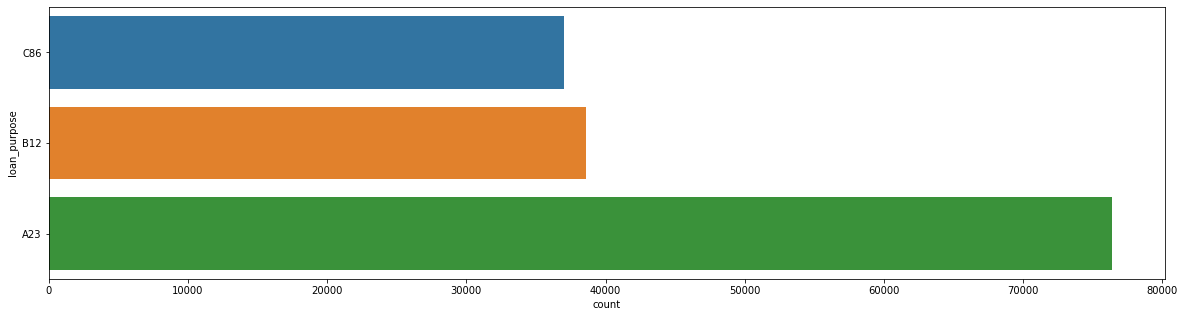

In [60]:
fig = plt.figure(figsize = (20,5))
sns.countplot(y='loan_purpose', data=data_bin);